In [1]:
# Step 1: Import commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style
sns.set(style="whitegrid")
%matplotlib inline

# Read the data
df = pd.read_csv('./data/train.csv')

# View the structure of the data
print("Data dimensions:", df.shape)
df.head()
df['Age_years'] = df['Age'] / 365


Data dimensions: (7905, 20)


In [2]:
# Step 2: Preliminary analysis
print("\nData types and missing values:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

print("\nDistribution of categorical variables (first 5):")
for col in df.select_dtypes(include='object').columns[:5]:
    print(df[col].value_counts())
    print("------")



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 

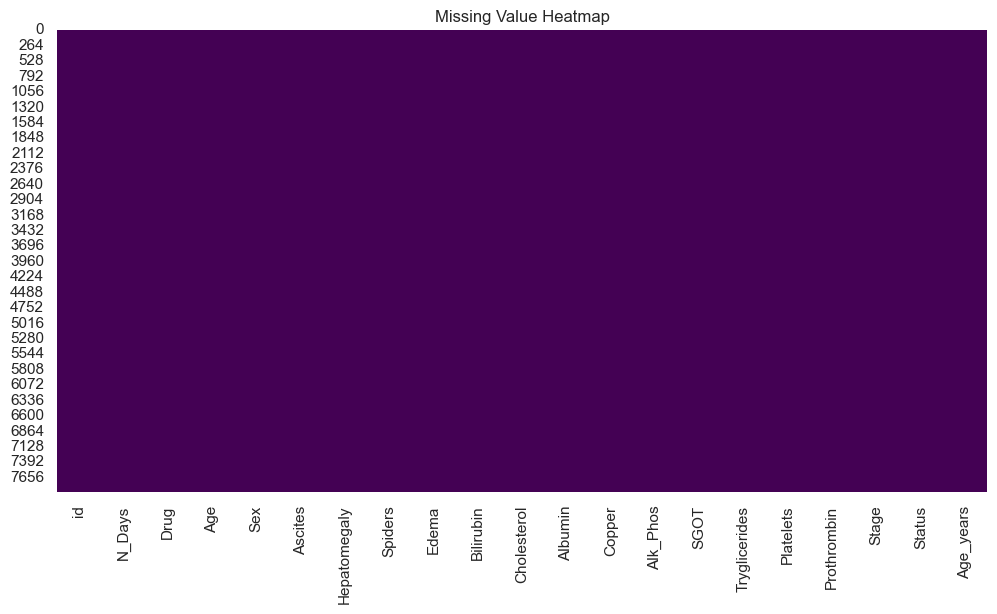

Missing Value Heatmap:
Series([], dtype: float64)


In [3]:
# Step 3: Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

# Proportion of missing values
missing = df.isnull().mean().sort_values(ascending=False)
print("Missing Value Heatmap:")
print(missing[missing > 0])

# Output explanation: There are no missing values in the dataset


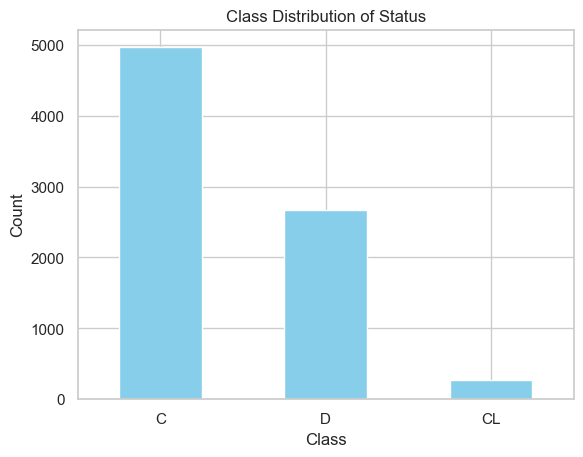

Class Proportions:
C     0.628083
D     0.337128
CL    0.034788
Name: Status, dtype: float64


In [5]:
# Step 4: Examine the distribution of the target variable
df['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution of Status")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display class proportions
print("Class Proportions:")
print(df['Status'].value_counts(normalize=True))



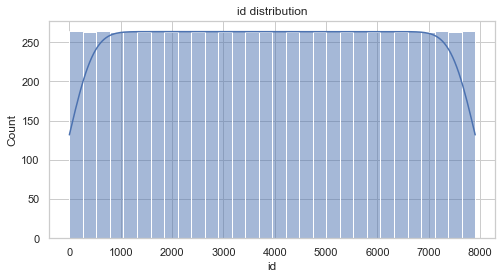

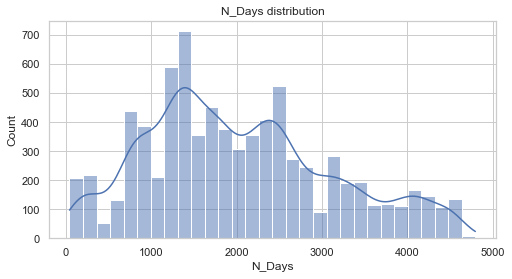

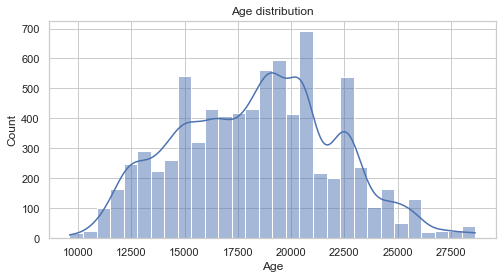

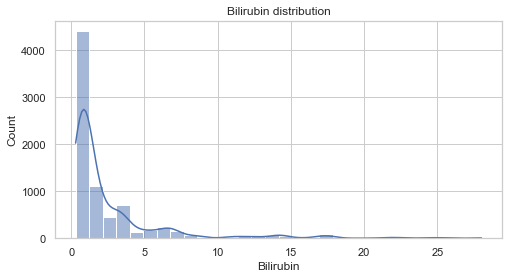

In [5]:
# Step 5: Visualize the distribution of several key numerical features (if available)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Example plots: distribution of the first 4 numerical features
for col in num_cols[:4]:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} distribution")
    plt.show()


In [6]:
# Step 6: Split features and target
X = df.drop(columns=['Status'])
y = df['Status']

print("Feature dimensions:", X.shape)
print("Number of target classes:", y.nunique())


Feature dimensions: (7905, 20)
Number of target classes: 3


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

test_df = pd.read_csv("./data/test.csv")

# Step 1: Drop ID column if it exists
X = X.drop(columns=['id'], errors='ignore')

# Step 2: Convert Age from days to years (if not already converted)
if X['Age'].max() > 200:  # sanity check
    X['Age'] = X['Age'] / 365

# Step 3: Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Step 5: Encode categorical features
X_encoded = X_scaled.copy()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))

# Step 6: Add encoded target
X_encoded['Status'] = y_encoded

# Step 7: Save to CSV
X_encoded.to_csv("./data/X_train_processed.csv", index=False)

print("Saved processed data:", X_encoded.shape)
X_encoded.head()



Saved processed data: (7905, 20)


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_years,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,-0.037522,0.858448,0,1,0,0,0,0,2
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,-0.037522,0.234760,1,0,0,0,0,0,0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,1.116605,-1.262634,1,0,0,1,1,2,2
3,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,-0.037522,0.023603,1,0,0,0,0,0,0
4,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,1.116605,-0.466107,1,0,0,1,0,0,0


In [145]:
# ---------------------------------------------------
# Section by Yujia Jiang
# #Sweep Experiment Utility
# Purpose: Analyze how increasing class1 weight affects F1, logloss, and confidence across models
# ---------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, log_loss
import matplotlib.pyplot as plt

def sweep_class_weights(train_and_predict_fn, class1_weights, y_val_true, labels=[0, 1, 2]):
    results = []
    for w in class1_weights:
        y_val_probs = train_and_predict_fn(class1_weight=w)
        y_pred = np.argmax(y_val_probs, axis=1)
        f1 = f1_score(y_val_true, y_pred, average=None, zero_division=0)[1]
        loss = log_loss(y_val_true, y_val_probs, labels=labels)

        confs = []
        for i in labels:
            if np.any(y_val_true == i):
                conf = np.mean(y_val_probs[y_val_true == i, i])
            else:
                conf = 0
            confs.append(conf)

        results.append({
            "class1_weight": w,
            "f1": f1,
            "avg_conf_class0": confs[0],
            "avg_conf_class1": confs[1],
            "avg_conf_class2": confs[2],
            "logloss": loss
        })
    return pd.DataFrame(results)

def plot_sweep_result(df):
    plt.figure(figsize=(10,6))
    plt.plot(df["class1_weight"], df["f1"], label="F1 (class1)", marker='o')
    plt.plot(df["class1_weight"], df["logloss"], label="LogLoss", marker='x')
    plt.plot(df["class1_weight"], df["avg_conf_class0"], label="AvgConf C0", linestyle='--')
    plt.plot(df["class1_weight"], df["avg_conf_class1"], label="AvgConf C1", linestyle='--')
    plt.plot(df["class1_weight"], df["avg_conf_class2"], label="AvgConf C2", linestyle='--')
    plt.xlabel("Class1 Weight")
    plt.ylabel("Metric")
    plt.title("Sweep Result")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔍 Best MLP Hyperparameters: {'dropout': 0.2161110664975669, 'lr': 0.004191437935321052}

Sweep Results:
 class1_weight        f1  avg_conf_class0  avg_conf_class1  avg_conf_class2   logloss
           1.0  0.000000         0.775822         0.120939         0.640518  0.488237
           2.0  0.100000         0.795077         0.156675         0.593202  0.495200
           3.0  0.189474         0.762178         0.221289         0.614421  0.509979
           4.0  0.291262         0.758320         0.277217         0.537095  0.536591
           5.0  0.215909         0.742760         0.346042         0.529538  0.563665
 class1_weight        f1  avg_conf_class0  avg_conf_class1  avg_conf_class2   logloss
           1.0  0.000000         0.775822         0.120939         0.640518  0.488237
           2.0  0.100000         0.795077         0.156675         0.593202  0.495200
           3.0  0.189474         0.762178         0.221289         0.614421  0.509979
           4.0  0.291262         0.

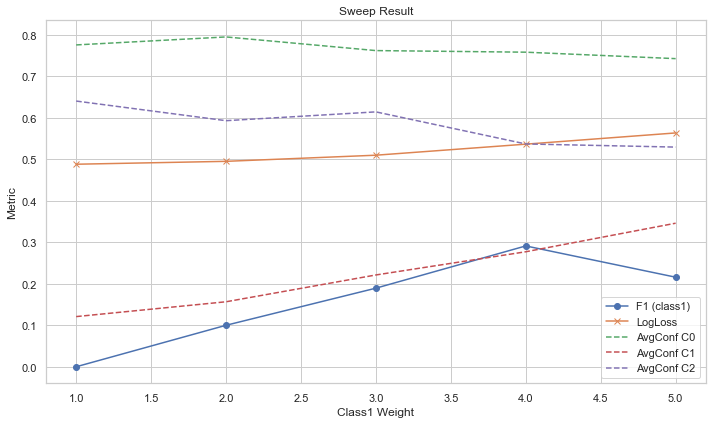

In [161]:
# ---------------------------------------------------
# Section by Yujia Jiang
# Model 1: MLP
# ---------------------------------------------------
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, log_loss
import optuna

# read data
df = pd.read_csv("./data/X_train_processed.csv")
X = df.drop(columns=['Status']).values
y = df['Status'].values

# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# MLP model
class FaceClassifier(nn.Module):
    def __init__(self, input_size, dropout_rate=0.3):
        super(FaceClassifier, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        self.output_layer = nn.Linear(64, 3)

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

# Optuna 
def objective(trial):
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    model = FaceClassifier(input_size=X.shape[1], dropout_rate=dropout)
    class_weights = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float32)
    loss_fn = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(10):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()

    model.eval()
    all_probs = []
    with torch.no_grad():
        for xb, _ in val_loader:
            probs = torch.softmax(model(xb), dim=1)
            all_probs.extend(probs.cpu().numpy())
    y_val_probs = np.array(all_probs)
    return log_loss(y_val, y_val_probs, labels=[0, 1, 2])

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20, show_progress_bar=False)

best_params = study.best_params
print(f"\n🔍 Best MLP Hyperparameters: {best_params}")

# Define train_and_predict function to be called by sweep_class_weights
def train_mlp(class1_weight):
    model = FaceClassifier(
        input_size=X.shape[1],
        dropout_rate=best_params['dropout']
    )
    class_weights = torch.tensor([1.0, class1_weight, 1.0], dtype=torch.float32)
    loss_fn = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

    for epoch in range(10):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()

    model.eval()
    all_probs = []
    with torch.no_grad():
        for xb, _ in val_loader:
            probs = torch.softmax(model(xb), dim=1)
            all_probs.extend(probs.cpu().numpy())
    return np.array(all_probs)

# sweep 
class1_weights_to_try = [1.0, 2.0, 3.0, 4.0, 5.0]
df_result = sweep_class_weights(
    train_and_predict_fn=train_mlp,
    class1_weights=class1_weights_to_try,
    y_val_true=y_val
)

print(df_result.to_string(index=False))
plot_sweep_result(df_result)


Best CatBoost Params (from Optuna):
{'iterations': 282, 'learning_rate': 0.04811880056588117, 'l2_leaf_reg': 0.5597309319959272, 'random_strength': 0.3371926503819605, 'bagging_temperature': 0.47564568108514343}

Sweep Results:
 class1_weight        f1  avg_conf_class0  avg_conf_class1  avg_conf_class2   logloss
           1.0  0.193548         0.830844         0.140671         0.663087  0.444750
           2.0  0.243243         0.817644         0.221050         0.649293  0.447942
           3.0  0.317073         0.808740         0.263899         0.638120  0.455118
           4.0  0.325581         0.802215         0.293930         0.635967  0.458435
           5.0  0.363636         0.796337         0.330610         0.625356  0.468674


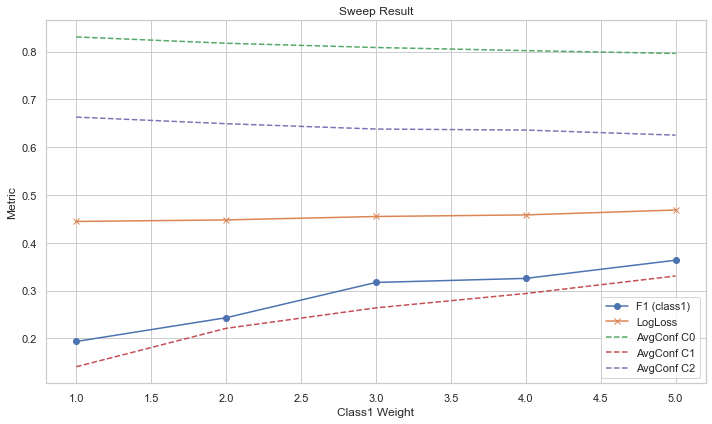

In [152]:
# ---------------------------------------------------
# Section by Mingxin Cao
# Model 2: CatBoost Classifier
# ---------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, log_loss
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import optuna
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

optuna.logging.set_verbosity(optuna.logging.WARNING)

# ---------------------------------------------------
# Read data and divide
# ---------------------------------------------------
df = pd.read_csv("./data/X_train_processed.csv")
X = df.drop(columns=['Status']).values
y = df['Status'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# optuna
# ---------------------------------------------------
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights_array)}

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 400),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.05, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'class_weights': class_weights_dict,
        'random_state': 42,
        'verbose': 0
    }
    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred, average='weighted')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=False)

best_params = study.best_params
print("Best CatBoost Params (from Optuna):")
print(best_params)

# ---------------------------------------------------
# Sweep: Repeat training, adjust class1 weights.
# ---------------------------------------------------
def train_catboost_with_weight(class1_weight):
    params = best_params.copy()
    params['class_weights'] = {0: 1.0, 1: class1_weight, 2: 1.0}
    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    return model.predict_proba(X_val)

# ---------------------------------------------------
# Sweep structured experimental tool function
# ---------------------------------------------------
def sweep_class_weights(train_and_predict_fn, class1_weights, y_val_true, labels=[0, 1, 2]):
    results = []
    for w in class1_weights:
        y_val_probs = train_and_predict_fn(class1_weight=w)
        y_pred = np.argmax(y_val_probs, axis=1)
        f1 = f1_score(y_val_true, y_pred, average=None, zero_division=0)[1]
        loss = log_loss(y_val_true, y_val_probs, labels=labels)

        confs = []
        for i in labels:
            if np.any(y_val_true == i):
                conf = np.mean(y_val_probs[y_val_true == i, i])
            else:
                conf = 0
            confs.append(conf)

        results.append({
            "class1_weight": w,
            "f1": f1,
            "avg_conf_class0": confs[0],
            "avg_conf_class1": confs[1],
            "avg_conf_class2": confs[2],
            "logloss": loss
        })

    df = pd.DataFrame(results)
    print("\nSweep Results:")
    print(df.to_string(index=False))
    return df
# ---------------------------------------------------
# Perform the sweep experiment 
# ---------------------------------------------------
weights_to_try = [1.0, 2.0, 3.0, 4.0, 5.0]
df_result = sweep_class_weights(train_catboost_with_weight, weights_to_try, y_val)
plot_sweep_result(df_result)


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[184]	valid_0's multi_logloss: 0.445387
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[435]	valid_0's multi_logloss: 0.438957
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[277]	valid_0's multi_logloss: 0.439979
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[140]	valid_0's multi_logloss: 0.444435
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[100]	valid_0's multi_logloss: 0.448993
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[297]	valid_0's multi_logloss: 0.440818
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[164]	valid_0's multi_logloss: 0.441202
Training until validation scores don't improve f

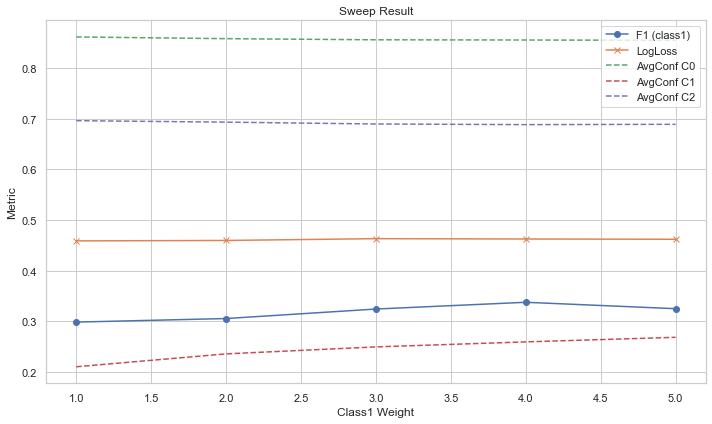

In [159]:
# ---------------------------------------------------
# Section by Xinrong Tang
# Model 4: LightGBM + Sweep + Optuna Tuning
# ---------------------------------------------------

import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss
import matplotlib.pyplot as plt

# Step 1: Load data and split
data = pd.read_csv('./data/X_train_processed.csv')
X = data.drop(columns=['Status'])
y = data['Status'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Optuna tuning (20 trials)
def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.7, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.7, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'random_state': 42,
        'verbosity': -1
    }

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_val],
        num_boost_round=500,
        callbacks=[
            lgb.early_stopping(20),
        ]
    )

    preds = model.predict(X_val, num_iteration=model.best_iteration)
    return log_loss(y_val, preds)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20, show_progress_bar=False)
best_params = study.best_params

# Step 3: Sweep runner
best_params.update({
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'verbosity': -1
})

def train_lgb_with_weight(class1_weight):
    sample_weights = np.ones_like(y_train, dtype=float)
    sample_weights[y_train == 1] = class1_weight

    train_set = lgb.Dataset(X_train, label=y_train, weight=sample_weights)
    model = lgb.train(
        best_params,
        train_set,
        num_boost_round=500
    )
    return model.predict(X_val)

# Step 4: Sweep + shared analysis function
def sweep_class_weights(train_and_predict_fn, class1_weights, y_val_true, labels=[0, 1, 2]):
    results = []
    for w in class1_weights:
        y_val_probs = train_and_predict_fn(class1_weight=w)
        y_pred = np.argmax(y_val_probs, axis=1)
        f1 = f1_score(y_val_true, y_pred, average=None, zero_division=0)[1]
        loss = log_loss(y_val_true, y_val_probs, labels=labels)

        confs = []
        for i in labels:
            if np.any(y_val_true == i):
                conf = np.mean(y_val_probs[y_val_true == i, i])
            else:
                conf = 0
            confs.append(conf)

        results.append({
            "class1_weight": w,
            "f1": f1,
            "avg_conf_class0": confs[0],
            "avg_conf_class1": confs[1],
            "avg_conf_class2": confs[2],
            "logloss": loss
        })

    df = pd.DataFrame(results)
    print("\nSweep Results:")
    print(df.to_string(index=False))
    return df

# Step 5: Run sweep
weights_to_try = [1.0, 2.0, 3.0, 4.0, 5.0]
df_result = sweep_class_weights(train_lgb_with_weight, weights_to_try, y_val)
plot_sweep_result(df_result)


Best XGBoost Params:
{'max_depth': 4, 'learning_rate': 0.048721582021164334, 'subsample': 0.6476934102093685, 'colsample_bytree': 0.9946857046537239, 'reg_alpha': 0.35438647028849457, 'reg_lambda': 0.7237303508148158}

Sweep Results:
 class1_weight        f1  avg_conf_class0  avg_conf_class1  avg_conf_class2   logloss
           1.0  0.036364         0.816567         0.135736         0.637398  0.458153
           2.0  0.243243         0.802665         0.214613         0.619285  0.465888
           3.0  0.230769         0.791147         0.264028         0.606426  0.476457
           4.0  0.326087         0.780913         0.310021         0.593355  0.488114
           5.0  0.365217         0.772184         0.338381         0.584425  0.500852


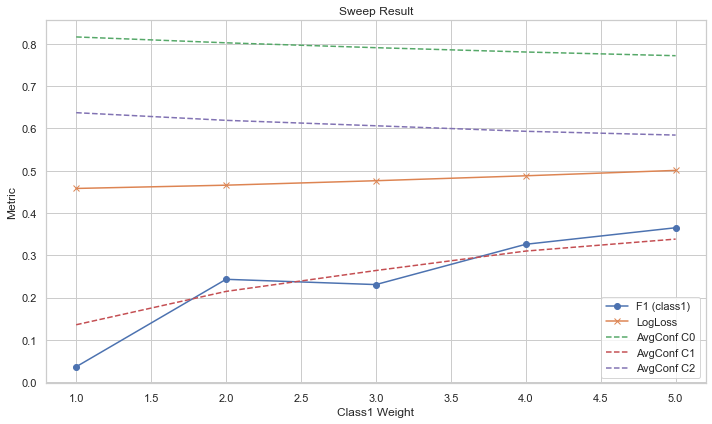

In [153]:
# ---------------------------------------------------
# Section by Yuqing Liu
# Model 3: XGBoost Classifier
# ---------------------------------------------------

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import optuna

# ---------------------------------------------------
# Step 1: Load and preprocess data
# ---------------------------------------------------
df = pd.read_csv("./data/X_train_processed.csv")
X = df.drop(columns=["Status"])
y = df["Status"].values

# Train/Val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# Step 2: Optuna tuning
# ---------------------------------------------------
class_weights = {i: w for i, w in enumerate(np.bincount(y_train).max() / np.bincount(y_train))}

def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'random_state': 42,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators': 300
    }
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred, average='weighted')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=False)
best_params = study.best_params
print("Best XGBoost Params:")
print(best_params)

# ---------------------------------------------------
# Step 3: Sweep function
# ---------------------------------------------------
def train_xgb_with_weight(class1_weight):
    params = best_params.copy()
    params.update({
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'random_state': 42,
        'class_weights': None  # XGBoost does not directly use class_weights param
    })
    model = xgb.XGBClassifier(**params)
    sample_weights = np.ones_like(y_train, dtype=float)
    sample_weights[y_train == 1] = class1_weight
    model.fit(X_train, y_train, sample_weight=sample_weights)
    return model.predict_proba(X_val)

# ---------------------------------------------------
# Step 4: Run Sweep
# ---------------------------------------------------
weights_to_try = [1.0, 2.0, 3.0, 4.0, 5.0]
df_result = sweep_class_weights(train_xgb_with_weight, weights_to_try, y_val)
plot_sweep_result(df_result)
